In [1]:
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display

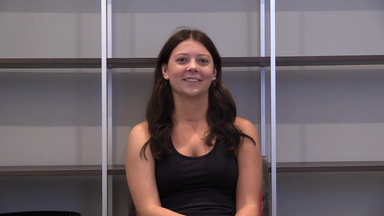

In [2]:
import os
# import augly.image as imaugs
# import augly.utils as utils
# from IPython.display import display

# Get input image, scale it down to avoid taking up the whole screen
input_img_path = os.path.join(
    utils.TEST_URI, "image", "inputs", "dfdc_1.jpg"
)

# We can use the AugLy scale augmentation
input_img = imaugs.scale('https://raw.githubusercontent.com/facebookresearch/AugLy/main/augly/tests/assets/image/inputs/dfdc_1.jpg', factor=0.2)
display(input_img)

In [14]:
"""
You can also pass in bounding boxes, which will be transformed along with
the image & included in the metadata (note: you must provide metadata to
get the transformed bboxes)
"""
meta = []
bboxes_original = [(20, 6, 250, 180)]

rotated_img = imaugs.rotate(
        input_img,
        degrees=90,
        metadata=meta,
        bboxes=bboxes_original,
        bbox_format="pascal_voc",
    )

meta

[{'name': 'rotate',
  'src_width': 384,
  'src_height': 216,
  'dst_width': 216,
  'dst_height': 384,
  'output_path': None,
  'degrees': 90,
  'bbox_format': 'pascal_voc',
  'src_bboxes': [(20, 6, 250, 180)],
  'dst_bboxes': [(6.0, 134.0, 180.0, 364.0)],
  'intensity': 50.0}]

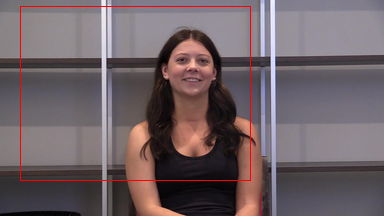

In [15]:

from PIL import Image, ImageDraw
# Draw the bounding box on the original image
original_image = input_img.copy()
draw = ImageDraw.Draw(original_image)
draw.rectangle(bboxes_original[0], outline="red")
original_image

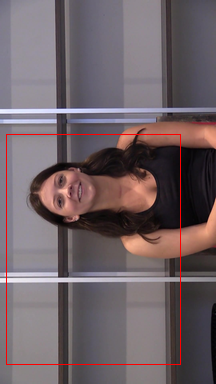

In [16]:
from PIL import Image, ImageDraw
# Draw the bounding box on the rotated image
rotated_img_1 = rotated_img.copy()
bbox_rotated = meta[0]['dst_bboxes'][0]
draw = ImageDraw.Draw(rotated_img_1)
draw.rectangle(bbox_rotated, outline="red")
rotated_img_1